# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r ndvi_paths ndvi_da boundary_gdf

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
import json                 # Reading and writing JSON
from glob import glob       # File pattern matching
import os                   # Operating system access
import pathlib              # File navigation

import earthpy              # Work with geospatial data
import xarray as xr         # Multi-dimensional arrays
import hvplot.xarray        # HVPlot and xarray
import rioxarray as rxr     # Raster for xarray

import matplotlib.pyplot as plt    # Plotting
import pandas as pd         # Work with tabular data
import geopandas as gpd     # Wowk with geospatial data
import hvplot.pandas        # Plot geospatial data

import osmnx as ox                  # Work with OSM
from osmnx import features as osm   # Work with OSM

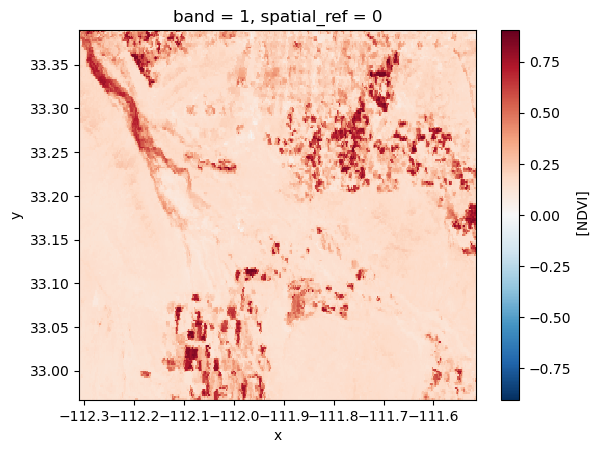

In [3]:
# Plot the first file

rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze().plot()

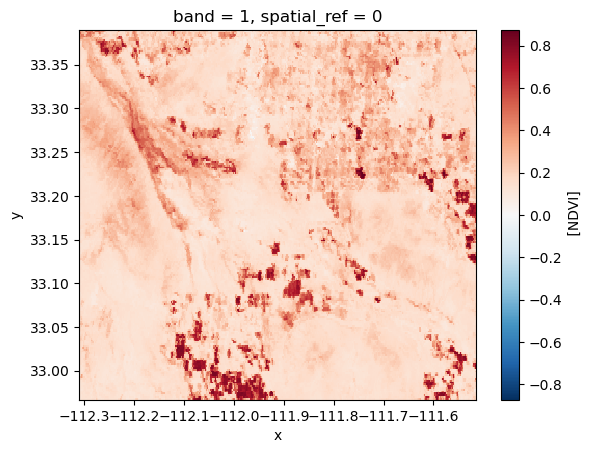

In [4]:
# Plot the last file

rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze().plot()

<Axes: title={'center': 'Gila River NDVI - 2022'}, xlabel='x', ylabel='y'>

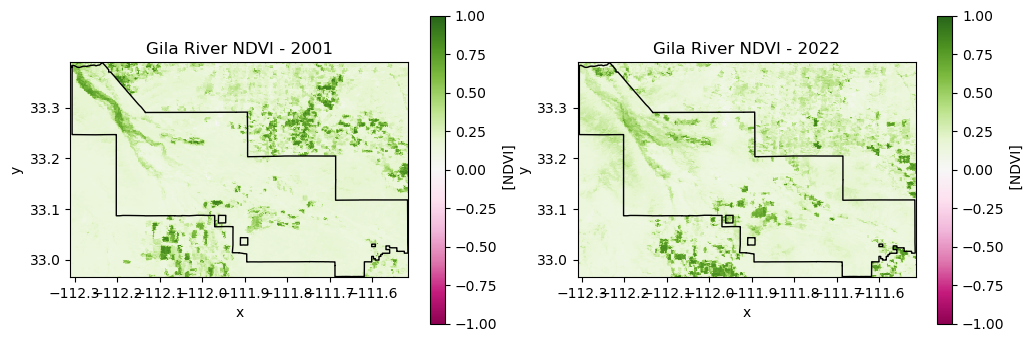

In [5]:
# Plot side by side
first_ndvi = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()
last_ndvi = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

first_ndvi.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
axes[0].set_title("Gila River NDVI - 2001")
boundary_gdf.plot(ax=axes[0], edgecolor='black', facecolor='none',
                  linewidth=1)


last_ndvi.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
axes[1].set_title("Gila River NDVI - 2022")
boundary_gdf.plot(ax=axes[1], edgecolor='black', facecolor='none',
                  linewidth=1)


# STEP 3: Plot NDVI
## IGNORE DATES

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

In [6]:
# Compute the difference in NDVI before and after
ndvi_diff = (ndvi_da
             .sel(date=slice('2012', '2022'))
             .mean('date')
             .NDVI
            - ndvi_da
             .sel(date=slice('2001', '2011'))
             .mean('date')
             .NDVI    
            )

ndvi_diff

<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

In [7]:
# Plot the difference
diff_plot = (
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', geo=True,
                     title = 'Gila River Indian Community NDVI\n'
                     'Comparing 2001-2011 to 2012-2022')
    *
    boundary_gdf.hvplot(geo=True, fill_color=None, line_color='black')
)

diff_plot

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [8]:
%store ndvi_da ndvi_paths diff_plot ndvi_diff

Stored 'ndvi_da' (Dataset)
Stored 'ndvi_paths' (list)
Stored 'diff_plot' (Overlay)
Stored 'ndvi_diff' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!